#  Machine Learning Assignment 1

## Q1  

Both problems are regression problems.

.

## Q2

(a) women’s mother took drugs and women’s mother didn’t take drugs.



(b) survey


(C) p =79/4230 = 0.0186
number of women out of 2000 in this population who have tissue abnormalities = 0.0186*2000 = 37


(d) Probability in the population of women whose mothers did not take the drug DES during pregnancy = 0.5*p = 0.5*0.0186 = 0.0093
number of women out of 2000 in this population who have tissue abnormalities = 0.0093*2000 = 19


(e) these are just estimations based on probability. Accuracy of estimations are high when data is large and we can not put the peoples live on risk with low accuracy.

# Q3

● If correlation coefficient of two variables is 0 then no functional relationships can exist between the variables. True


● Correlation ranges between -1 and +1              True


● Covariance ranges between -1 and +1               False


● Covariance is affected by the change in scale     True


● Covariance is dimensionless.                      False


● Correlation refers to the scaled form of covariance.  True


● Two independent random variables are always uncorrelated.  True


● If X and Y are uncorrelated then X and Y are independent.  True


● The covariance of a random variable with a constant is one.  True

# Q4

 θ0=0, θ1=0.5 (best fit)

.

# Q5

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Dataset.xlsx')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
Data = data.iloc[:,:4]

In [5]:
Data.shape

(200, 4)

In [6]:
Data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


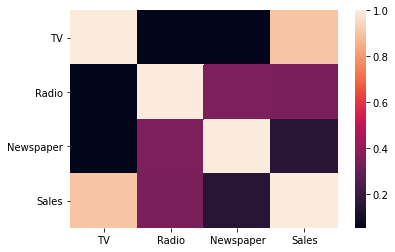

In [7]:
sns.heatmap(Data.corr())

### Advertiesment more correlated with sales

In [8]:
max(Data.corr())

'TV'

TV ads are more collerated with slaes

# Training of Linear regression models

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Data.shape

(200, 4)

In [11]:
Data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
X = Data.iloc[:,:3]
Y = Data.iloc[:,3]

In [13]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, random_state= 100, test_size = 0.3)

In [15]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((140, 3), (60, 3), (140,), (60,))

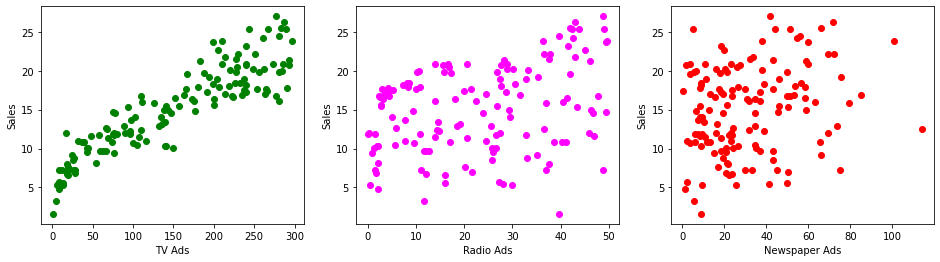

In [16]:
plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
plt.scatter(train_x['TV'], train_y, color = 'green')
plt.xlabel('TV Ads')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(train_x['Radio'], train_y, color = 'magenta')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')

plt.subplot(1,3,3)
plt.scatter(train_x['Newspaper'], train_y, color = 'red')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')

plt.show()

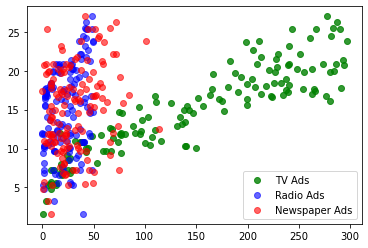

In [17]:
plt.scatter(train_x['TV'], train_y, label = "TV Ads" , color = 'g', alpha = 0.8)
plt.scatter(train_x['Radio'], train_y, label = "Radio Ads", color = 'b', alpha = 0.6)
plt.scatter(train_x['Newspaper'], train_y, label = "Newspaper Ads", color = 'r', alpha = 0.6)
plt.legend()
plt.show()

In [18]:
lr_tv = LinearRegression()
lr_tv.fit(np.array(train_x['TV']).reshape(-1,1),train_y)

LinearRegression()

In [19]:
lr_rad = LinearRegression()
lr_rad.fit(np.array(train_x['Radio']).reshape(-1,1),train_y)

LinearRegression()

In [20]:
lr_news = LinearRegression()
lr_news.fit(np.array(train_x['Newspaper']).reshape(-1,1),train_y)

LinearRegression()

### MSE and R Square of each model

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse_tv = mean_squared_error(test_y, lr_tv.predict(np.array(test_x['TV']).reshape(-1,1)))
mse_rad = mean_squared_error(test_y, lr_rad.predict(np.array(test_x['Radio']).reshape(-1,1)))
mse_news = mean_squared_error(test_y, lr_news.predict(np.array(test_x['Newspaper']).reshape(-1,1)))

In [23]:
print('MSE of model TV: ',mse_tv)
print('MSE of model Radio: ',mse_rad)
print('MSE of model Newspaper: ',mse_news)

MSE of model TV:  4.077556371826949
MSE of model Radio:  16.590289124066075
MSE of model Newspaper:  22.448939159682645


In [25]:
print('R Square of model TV: ', 1 - mse_tv/mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))
print('R Square of model Radio: ', 1 - mse_rad/mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))
print('R Square of model Newspaper: ', 1 - mse_news/mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))

R Square of model TV:  0.7921031601245662
R Square of model Radio:  0.15413341545839598
R Square of model Newspaper:  -0.14457363289935854


### Multiple Linear Regression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(train_x,train_y)

LinearRegression()

In [28]:
mse_mlr = mean_squared_error(test_y, lr.predict(test_x))
print('MSE of model mlr: ' , mse_mlr)

MSE of model mlr:  2.6360765623280655


In [29]:
print('R square of mlr model: ',1 - mse_mlr/mean_squared_error(test_y, [test_y.mean()]*test_y.shape[0]))

R square of mlr model:  0.8655979373420272


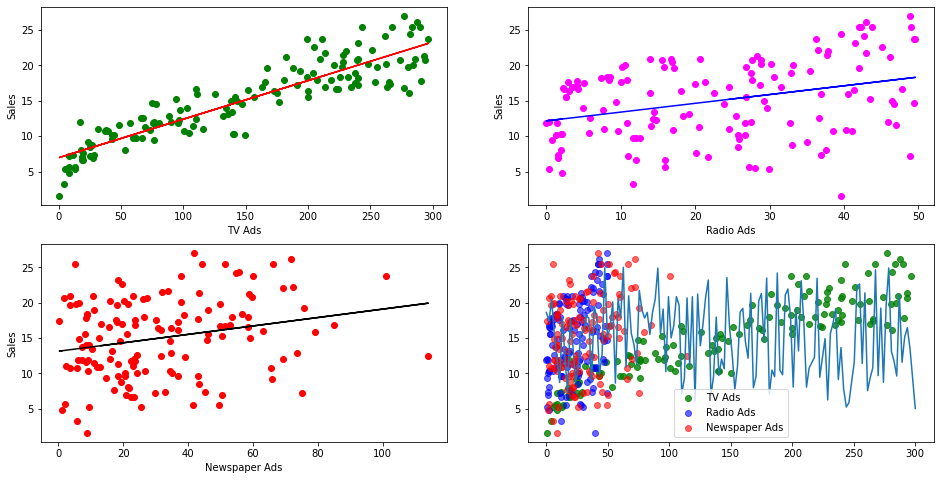

In [54]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
plt.scatter(train_x['TV'], train_y, color = 'green')
plt.plot(train_x['TV'], lr_tv.predict(np.array(train_x['TV']).reshape(-1,1)), color = 'r')
plt.xlabel('TV Ads')
plt.ylabel('Sales')

plt.subplot(2,2,2)
plt.scatter(train_x['Radio'], train_y, color = 'magenta')
plt.plot(train_x['Radio'], lr_rad.predict(np.array(train_x['Radio']).reshape(-1,1)), color = 'b')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')

plt.subplot(2,2,3)
plt.scatter(train_x['Newspaper'], train_y, color = 'red')
plt.plot(train_x['Newspaper'], lr_news.predict(np.array(train_x['Newspaper']).reshape(-1,1)), color = 'k')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')

plt.subplot(2,2,4)
plt.scatter(train_x['TV'], train_y, label = "TV Ads" , color = 'g', alpha = 0.8)
plt.scatter(train_x['Radio'], train_y, label = "Radio Ads", color = 'b', alpha = 0.6)
plt.scatter(train_x['Newspaper'], train_y, label = "Newspaper Ads", color = 'r', alpha = 0.6)
plt.plot(np.linspace(0,300,140), lr.predict(np.array(train_x)))
plt.legend()

plt.show()

## Conclusion

Multiple Linear Regression moldel has better accuracy than other models 


.

# Q7

### Box plot

In [ ]:
num = [3,5,8,8,9,11,12,12,13,13,16]

In [ ]:
plt.boxplot(num)
plt.show()

# Q8

Given: R-squared value =  0.5 

sample size = 50 

Number of preditors = 5

R square adjusted = 1- (1-.5^2)(50-1)/(50-5-1) = 0.16
